## 1. Obtain the Input Image from Dataset

In [37]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

* Use libraries TensorFlow to load the dataset.
* The dataset will be split into training and testing sets.

## 2. Perform Image Preprocessing

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

* Normalize pixel values to the range [0, 1] or [-1, 1].
* Convert labels to one-hot encoding.

## 3. Localization and Segmentation of Object

#### For CIFAR-10, localization and segmentation are not required because the images are already centered and contain a single object.

## 4. Decision

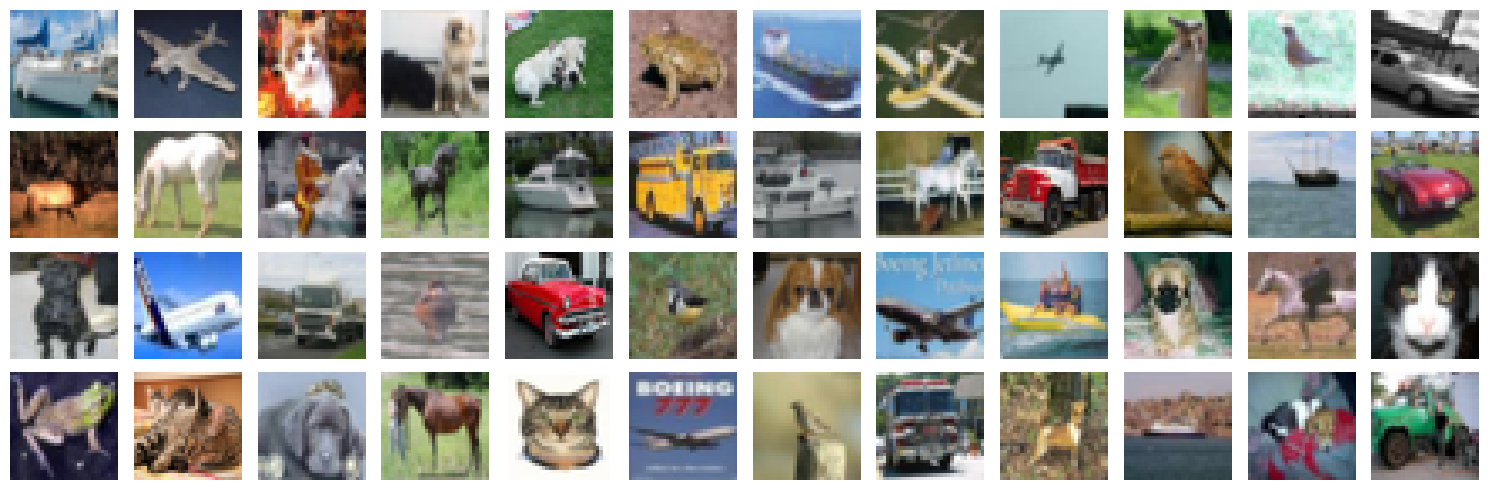

In [11]:
rows, cols = 4, 12  # 4 rows, 12 images per row

# Select 48 random images from training data
indices = np.random.choice(len(x_train), rows * cols, replace=False)

# Plot the images
fig, axes = plt.subplots(rows, cols, figsize=(15, 5))  # Adjust figure size

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[indices[i]])
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()

## 5. BI_CNN_FTA (Bidirectional CNN with Feature Transfer and Attention)

#### This step is about building a smart system (a CNN model) that can look at images and figure out what’s in them. The fancy name "BI_CNN_FTA" means:
 * Bidirectional CNN: The system looks at the image in different ways (like zooming in and out) to understand it better.
 * Feature Transfer: Instead of starting from scratch, the system uses knowledge from other similar tasks (like recognizing cats or dogs in other datasets).
* Attention: The system focuses on the most important parts of the image (like the face of a cat or the wheels of a car).

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

## 6. Initial and Adjustable Training Set

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.3236 - loss: 1.8513 - val_accuracy: 0.4880 - val_loss: 1.4409
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.5375 - loss: 1.3079 - val_accuracy: 0.5712 - val_loss: 1.2294
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5871 - loss: 1.1652 - val_accuracy: 0.6001 - val_loss: 1.1484
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6300 - loss: 1.0667 - val_accuracy: 0.6316 - val_loss: 1.0725
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.6568 - loss: 0.9944 - val_accuracy: 0.6503 - val_loss: 1.0250
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.6776 - loss: 0.9312 - val_accuracy: 0.6631 - val_loss: 0.9938
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6956 - loss: 0.8921 - val_accuracy: 0.6593 - val_loss: 1.0023
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.7114 - loss: 0.8406 - 

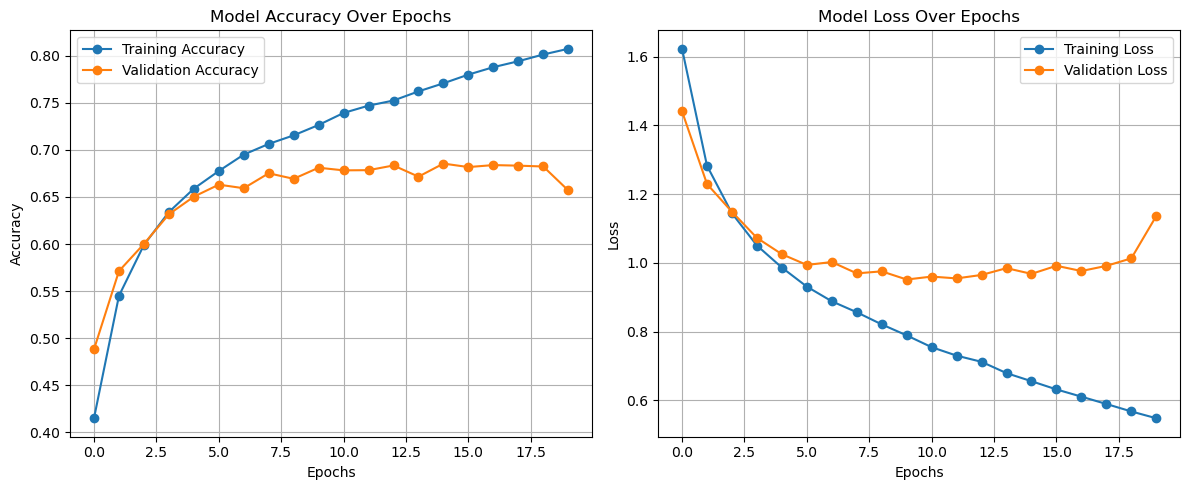

In [17]:
def plot_training_history(history):
    """
    Plots training and validation accuracy and loss curves.

    Args:
    history: Training history object returned by the fit() method.
    """
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)

## 7. Detection and Classification of Object

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6678 - loss: 1.1293
Test Accuracy: 0.6638000011444092


In [20]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


## 8. Show the Dataset Object

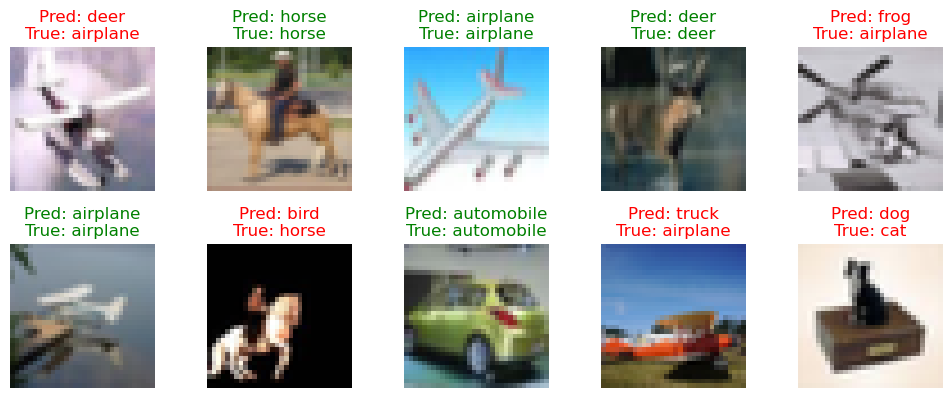

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select 10 random images from x_test
num_images = 10
random_indices = np.random.choice(len(x_test), num_images, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)  # Adjusted for better layout (4 rows, 3 columns)
    
    plt.imshow(x_test[idx])  # Display image
    
    pred_class = np.argmax(predictions[idx])  # Get predicted class
    true_class = np.argmax(y_test[idx]) if y_test.ndim > 1 else y_test[idx]  # Convert one-hot to integer if necessary    

    color = "green" if pred_class == true_class else "red"  # Correct = green, Incorrect = red
    plt.title(f"Pred: {class_names[pred_class]}\nTrue: {class_names[true_class]}", color=color)
    
    plt.axis('off')  # Hide axis

plt.tight_layout()
plt.show()


## Step 9: End

In [24]:
# Save the model
model.save('cifar10_model.h5')